#### Import libraries and read in data

Import all necessary libraries and read in Boston Airbnb Open Data (only listings are necessary for answering the defined business questions).

In [345]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge, Lars, SGDRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

# show all columns
pd.set_option('display.max_columns', 92)

# read in data
df = pd.read_csv('./listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [346]:
df.shape

(3818, 92)

In [347]:
df['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

In [348]:
df['price'].isnull().values.any()

False

In [349]:
# encode price column
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'])

#### Question 1: What is the average price per guest in each neighbourhood?

Therefore another dataset containing the relevant columns (neighbourhood_group_cleansed, guests_included, price) has to be created. After a groupby of the neighbourhood column the mean of the other two columns can be calculated. Afterwards a simple divison does the trick.

In [350]:
neighbourhood_group_cleansed_has_nulls = df['neighbourhood_group_cleansed'].isnull().values.any()
print(neighbourhood_group_cleansed_has_nulls)

guests_included_has_nulls = df['guests_included'].isnull().values.any()
print(guests_included_has_nulls)

False
False


In [351]:
q1_cols = ['neighbourhood_group_cleansed', 'guests_included', 'price']
q1_df = df[q1_cols]

q1_df_grouped = q1_df.groupby(['neighbourhood_group_cleansed']).mean()
q1_df_grouped['price_per_guest'] = q1_df_grouped['price'] / q1_df_grouped['guests_included']
q1_df_grouped.head(30)

,guests_included,price,price_per_guest
neighbourhood_group_cleansed,,,
Ballard,1.865217,124.682609,66.846154
Beacon Hill,1.440678,94.669492,65.711765
Capitol Hill,1.537919,130.592593,84.915138
Cascade,1.516854,140.101124,92.362963
Central Area,1.845528,128.338753,69.540382
Delridge,1.506329,83.278481,55.285714
Downtown,1.467925,154.405660,105.186375
Interbay,1.181818,109.727273,92.846154
Lake City,1.417910,92.671642,65.357895


In [352]:
q1_df_grouped = q1_df_grouped.drop(['guests_included', 'price'], axis=1)

In [353]:
q1_df_sorted = q1_df_grouped.sort_values(by=['price_per_guest'], ascending=False)

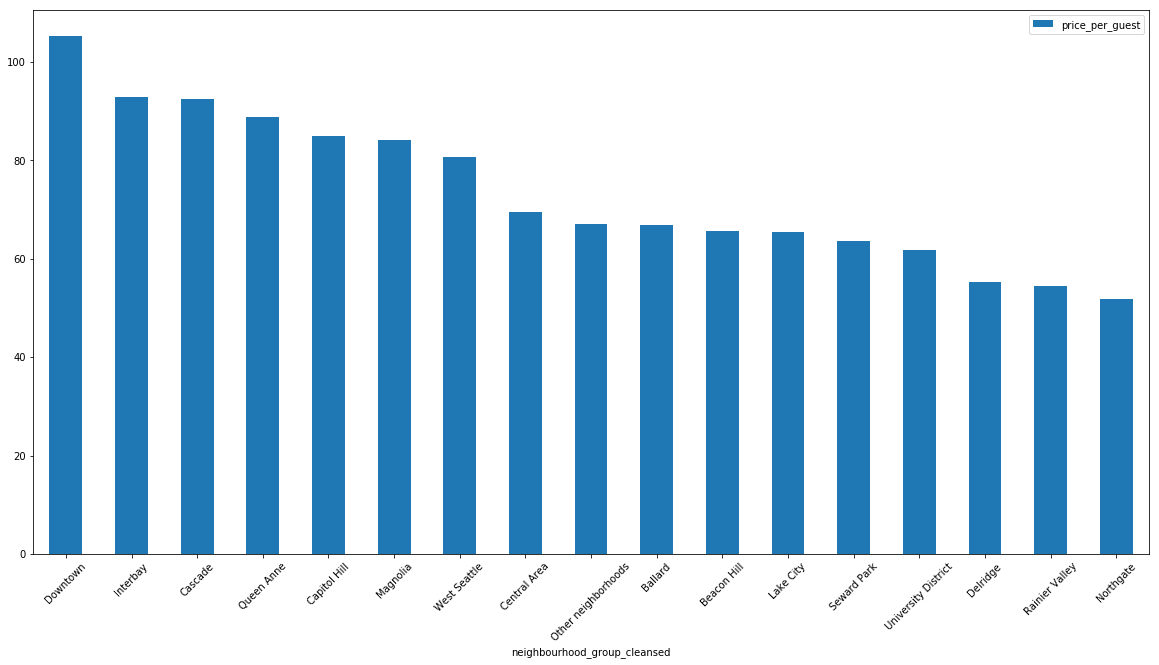

In [354]:
barplot = q1_df_sorted.plot.bar(figsize = (20,10), label = 'Price Per Guest', rot=45)

#### Question 2: Which neighbourhood has the highest rated listings?

Therefore another dataset containing the relevant columns (neighbourhood_group_cleansed, review_scores_rating) has to be created. First of all rows containing NaN values in the column review_scores_rating have to be removed. After a groupby of the neighbourhood column the mean of the review ratings can be calculated.

In [355]:
review_scores_rating_has_nulls = df['review_scores_rating'].isnull().values.any()
print(review_scores_rating_has_nulls)
print(df['review_scores_rating'].isna().sum())

True
647


In [356]:
q2_cols = ['neighbourhood_group_cleansed', 'review_scores_rating']
q2_df = df[q2_cols]

# remove rows with nan values
q2_df_dropped_nan = q2_df.dropna(subset=['review_scores_rating'])
q2_df_dropped_nan.head()

,neighbourhood_group_cleansed,review_scores_rating
0,Queen Anne,95.0
1,Queen Anne,96.0
2,Queen Anne,97.0
4,Queen Anne,92.0
5,Queen Anne,95.0


In [357]:
q2_df_grouped = q2_df_dropped_nan.groupby(['neighbourhood_group_cleansed']).mean()
q2_df_grouped.head(30)

,review_scores_rating
neighbourhood_group_cleansed,
Ballard,95.533679
Beacon Hill,94.019417
Capitol Hill,94.184783
Cascade,92.461538
Central Area,96.009404
Delridge,95.861538
Downtown,93.958333
Interbay,93.777778
Lake City,94.375000


In [358]:
q2_df_sorted = q2_df_grouped.sort_values(by=['review_scores_rating'], ascending=False)

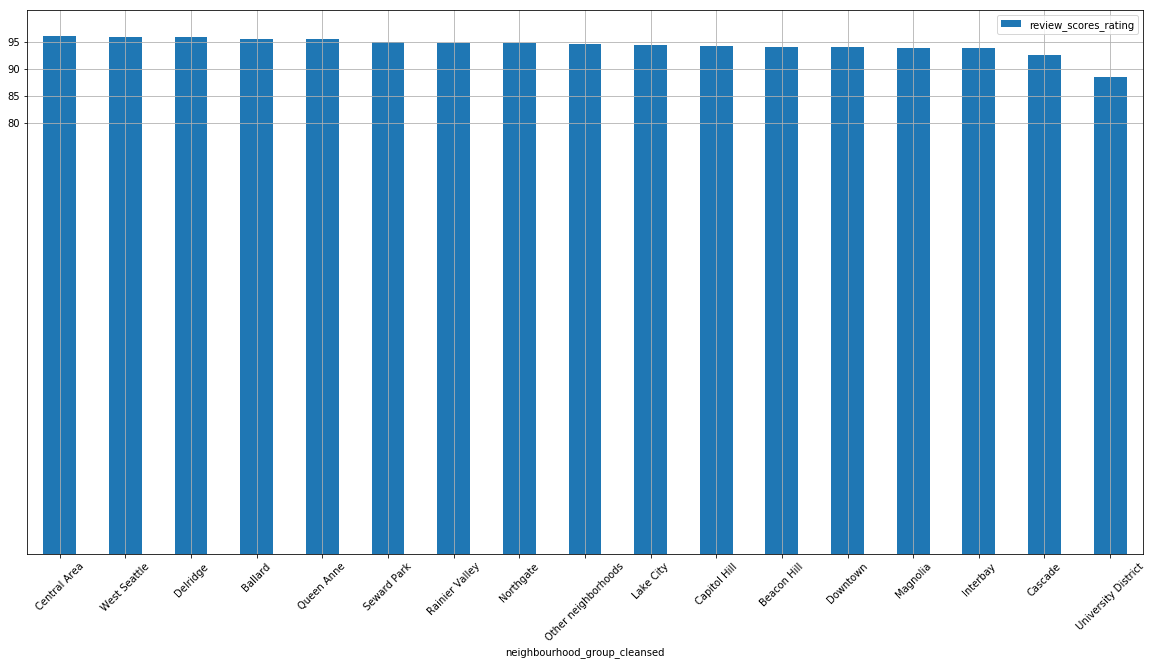

In [359]:
barplot = q2_df_sorted.plot.bar(figsize = (20,10), label = 'Review Scores Rating', rot=45, grid=True, yticks=[80,85,90,95])

#### Question 3: Which factors have the most influence on the price?

Several steps have to be executed to answer the question:
- Define which features have to be taken into account and how to encode them (host related features and redundant features like availability/ratings/cleaning fee are not taken into account)
- drop features with a high NaN percentage
- impute missing values with mean/mode
- one hot encode categorical features
- split data into explanatory and response (price) values
- split data into training and testing data
- instantiate model and fit data to model
- determine the model's coefficients

Note:
As model the linear model LARS is used. LARS stands for least-angle regression and is an algorithm for fitting liner regression models to high-dimensional data.

In [360]:
q3_cols = []

q3_cols.append('neighbourhood_group_cleansed') #object - one hot encoding
q3_cols.append('property_type') #object - one hot encoding
q3_cols.append('room_type') #object - one hot encoding
q3_cols.append('bathrooms') #float
q3_cols.append('bed_type') #object - one hot encoding
q3_cols.append('square_feet') #float
q3_cols.append('price') #object - already encoded to float
q3_cols.append('guests_included') #int
q3_cols.append('minimum_nights') #int
q3_cols.append('maximum_nights') #int
q3_cols.append('availability_90') #int
q3_cols.append('number_of_reviews') #int
q3_cols.append('review_scores_rating') #float
q3_cols.append('instant_bookable') #object - one hot encoding
q3_cols.append('cancellation_policy') #object - one hot encoding
q3_cols.append('reviews_per_month') #float

q3_df = df[q3_cols]

#explain host, avialiability, ratings, cleaning_fee

In [361]:
def count_nulls(df, col):
    print(col + ': ' + str(df[col].isna().sum()))
    return

for col in q3_df.columns:
    count_nulls(q3_df, col)

neighbourhood_group_cleansed: 0
property_type: 1
room_type: 0
bathrooms: 16
bed_type: 0
square_feet: 3721
price: 0
guests_included: 0
minimum_nights: 0
maximum_nights: 0
availability_90: 0
number_of_reviews: 0
review_scores_rating: 647
instant_bookable: 0
cancellation_policy: 0
reviews_per_month: 627


In [362]:
# drop square_feet column because of too many null values
q3_df = q3_df.drop(columns=['square_feet'], axis=1)

In [363]:
ints = []
floats = []
objects = []

for col in q3_df.columns:
    if(q3_df[col].dtype == 'float64'):
        floats.append(q3_df[col].name)
    elif(q3_df[col].dtype == 'int64'):
        ints.append(q3_df[col].name)
    elif(q3_df[col].dtype == 'object'):
        objects.append(q3_df[col].name)
        
print("ints:" + str(ints))
print("floats:" + str(floats))
print("objects:" + str(objects))

ints:['guests_included', 'minimum_nights', 'maximum_nights', 'availability_90', 'number_of_reviews']
floats:['bathrooms', 'price', 'review_scores_rating', 'reviews_per_month']
objects:['neighbourhood_group_cleansed', 'property_type', 'room_type', 'bed_type', 'instant_bookable', 'cancellation_policy']


In [364]:
fill_mean = lambda col: col.fillna(col.mean()) # Mean function

In [365]:
fill_mode = lambda col: col.fillna(col.mode()[0]) # Mode function

In [366]:
def fill_na(df, cat_cols, fill_method):
    for col in cat_cols:
        print(col)
        df = pd.concat([df.drop(col, axis=1), df[[col]].apply(fill_method, axis=0)], axis=1) 
    return df

In [367]:
# fill missing values in float features with the mean values
q3_df_filled_na = fill_na(q3_df, ['bathrooms', 'reviews_per_month'], fill_mean)

bathrooms
reviews_per_month


In [368]:
# fill missing values in objects (property_type) with mode
q3_df_filled_na = fill_na(q3_df_filled_na, ['property_type'], fill_mode)

property_type


In [369]:
# review_scores_rating = float: mean from q2 (nearest neighbour)
q3_df_filled_na['review_scores_rating'] = q3_df_filled_na.apply(
    lambda row: q2_df_grouped['review_scores_rating'][row['neighbourhood_group_cleansed']] if np.isnan(row['review_scores_rating']) else row['review_scores_rating'],
    axis=1
)

for col in q3_df_filled_na.columns:
    count_nulls(q3_df_filled_na, col)

neighbourhood_group_cleansed: 0
room_type: 0
bed_type: 0
price: 0
guests_included: 0
minimum_nights: 0
maximum_nights: 0
availability_90: 0
number_of_reviews: 0
review_scores_rating: 0
instant_bookable: 0
cancellation_policy: 0
bathrooms: 0
reviews_per_month: 0
property_type: 0


In [370]:
def create_dummy(df, cat_cols):
    for col in cat_cols:
        print(col)
        df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=False, dummy_na=False)], axis=1)
    return df

q3_df_one_hot_encoded = create_dummy(q3_df_filled_na, objects)
print(q3_df_one_hot_encoded.shape)

neighbourhood_group_cleansed
property_type
room_type
bed_type
instant_bookable
cancellation_policy
(3818, 55)


In [371]:
q3_df_one_hot_encoded.head()

,price,guests_included,minimum_nights,maximum_nights,availability_90,number_of_reviews,review_scores_rating,bathrooms,reviews_per_month,neighbourhood_group_cleansed_Ballard,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,instant_bookable_f,instant_bookable_t,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,85.0,2,1,365,71,207,95.000000,1.0,4.070000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0
1,150.0,1,2,90,16,43,96.000000,1.0,1.480000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1
2,975.0,10,4,30,17,20,97.000000,4.5,1.150000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1
3,100.0,1,1,1125,0,0,95.443089,1.0,2.078919,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0
4,450.0,6,1,1125,90,38,92.000000,2.0,0.890000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1


In [373]:
#Split into explanatory and response variables
X = q3_df_one_hot_encoded.drop('price', axis=1)
y = q3_df_one_hot_encoded['price']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

# 
lm_model = Lars(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

print(train_score)
print(test_score)


0.48856265443
0.511876017359


In [374]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(60)

,est_int,coefs,abs_coefs
27,property_type_Boat,116.494698,116.494698
30,property_type_Camper/RV,66.418631,66.418631
6,bathrooms,59.873118,59.873118
41,room_type_Entire home/apt,58.926806,58.926806
33,property_type_Dorm,46.896118,46.896118
14,neighbourhood_group_cleansed_Downtown,41.236184,41.236184
43,room_type_Shared room,-38.283303,38.283303
11,neighbourhood_group_cleansed_Cascade,33.085558,33.085558
17,neighbourhood_group_cleansed_Magnolia,31.253175,31.253175
20,neighbourhood_group_cleansed_Queen Anne,28.330792,28.330792


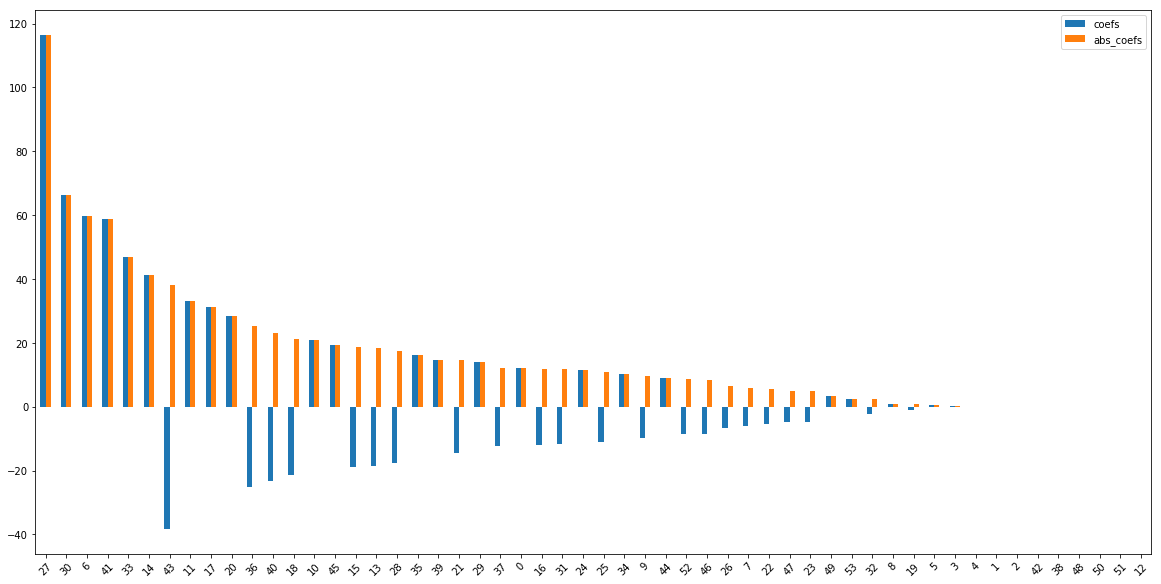

In [344]:
barplot = coef_df.plot.bar(figsize = (20,10), label = 'Coef', rot=45)